In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from notebook_tools import *

In [2]:
#mesh_path = "/mnt/daredevildiag/6PACK/z3d/ds1/o3d_iter0_pcd.ply"
#mesh_path = "/home/redne/pvnet/file-converter-.obj-to-.ply/coffeeCup.ply"
#mesh_path = "/mnt/daredevildiag/z3d/AR_team/coffeeCup_model/coffeeCup.ply"
mesh_path = '/home/redne/ZeroWaste3D/research/6D_Pose/sample/obj_000001.ply'
mesh_files = load_mesh_files(mesh_path)
mesh_files[:20]

['ply',
 'format ascii 1.0',
 'comment VTK generated PLY File',
 'obj_info vtkPolyData points and polygons: vtk4.0',
 'element vertex 29817',
 'property float x',
 'property float y',
 'property float z',
 'element face 59552',
 'property list uchar int vertex_indices',
 'end_header',
 '-0.289288 -118.66 0.428882',
 '-48.5636 -105.703 15.3915',
 '-41.3627 -105.741 29.5355',
 '-30.1245 -105.771 40.7627',
 '-15.9691 -105.79 47.9807',
 '-0.291996 -105.797 50.4704',
 '-0.282822 -105.525 -50.9956',
 '-15.9752 -105.531 -48.4472',
 '-30.131 -105.551 -41.377']

The information from the `.ply` point cloud data are broken down into 9 specific indexes for each row, read as

- Col: 0-2  are `vertices`
- Col: 3-5  are `normals`
- Col: 6-8  are `colors`

In [4]:
pts = np.array(mesh_files[mesh_files.index("end_header") + 1:])

### Get 3D Corners of Verticies

In [5]:
x = []
y = []
z = []
np_points = np.array(pts)
for i in range(0, len(pts)):
    pts_groups = pts[i].split(' ')
    x.append(pts_groups[0])
    y.append(pts_groups[1])
    z.append(pts_groups[2])
pts_coord = [x, y, z]
np_points = np.array(pts_coord).astype(float)

corners = get_3D_corners(np_points)
corners

array([[-5.10456e+01, -5.10456e+01, -5.10456e+01, -5.10456e+01,
         5.04728e+01,  5.04728e+01,  5.04728e+01,  5.04728e+01],
       [-1.28500e+02, -1.28500e+02,  2.97360e+04,  2.97360e+04,
        -1.28500e+02, -1.28500e+02,  2.97360e+04,  2.97360e+04],
       [-5.09956e+01,  2.98160e+04, -5.09956e+01,  2.98160e+04,
        -5.09956e+01,  2.98160e+04, -5.09956e+01,  2.98160e+04],
       [ 1.00000e+00,  1.00000e+00,  1.00000e+00,  1.00000e+00,
         1.00000e+00,  1.00000e+00,  1.00000e+00,  1.00000e+00]])

Here we are able to plot the point cloud

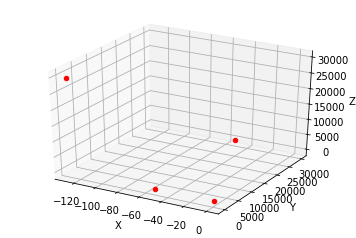

In [6]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
for item in corners:
    # info_groups = item.split(' ')
    ax.scatter(float(item[0]), float(item[1]), float(item[2]), c='r')
ax.set_zlabel('Z')
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()